<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/RedunsebleBully_new28FEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Approach

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Reading the dataset
data = pd.read_csv('/content/Bully_Sent_Emo_IEEEIC_6084.csv')


data.head(3)


,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others


In [ ]:
# Preprocessing the dataset
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
X = vectorizer.fit_transform(data['Processed_Tweets'])
y = data['Bully_Label']

# Creating base models
model1 = DecisionTreeClassifier()
model2 = SVC(kernel='linear', probability=True)
model3 = MultinomialNB()


In [ ]:
# Creating an ensemble model
ensemble = VotingClassifier(estimators=[('dt', model1), ('svm', model2), ('nb', model3)], voting='soft')

# Training the ensemble model
ensemble.fit(X, y)

# Evaluating the performance of the model
y_pred = ensemble.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9886587771203156
Precision: 0.9887387324941377
Recall: 0.9886587771203156
F1-score: 0.9886581198496277


# Second Approach

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:

# Reading the dataset
data = pd.read_csv('/content/Bully_Sent_Emo_IEEEIC_6084.csv')

# Preprocessing the dataset
X = data['Processed_Tweets'].values
y = data['Bully_Label'].values

In [ ]:
data.tail(3)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
6081,Khatna pe to bol diya ek baat bata upar wala t...,Khatna pe to bol diya ek baat bata upar wala t...,1,Negative,Others
6082,Chal be bhadwe sanghi.. teri maa ki choot me g...,Chal be bhadwe sanghi teri maa ki choot me gho...,1,Negative,Disgust
6083,"इश्क़ में थे जब,\nवादा हमारा,\nदावा भी हमारा,\...",इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...,0,Neutral,Sadness


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the deep learning model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
61/61 [==============================] - 21s 297ms/step - loss: 0.5632 - accuracy: 0.6971 - val_loss: 0.4427 - val_accuracy: 0.7752
Epoch 2/10
61/61 [==============================] - 18s 289ms/step - loss: 0.2947 - accuracy: 0.8723 - val_loss: 0.4096 - val_accuracy: 0.8162
Epoch 3/10
61/61 [==============================] - 18s 290ms/step - loss: 0.1931 - accuracy: 0.9258 - val_loss: 0.5261 - val_accuracy: 0.8060
Epoch 4/10
61/61 [==============================] - 17s 283ms/step - loss: 0.1149 - accuracy: 0.9610 - val_loss: 0.6338 - val_accuracy: 0.7957
Epoch 5/10
61/61 [==============================] - 18s 295ms/step - loss: 0.0788 - accuracy: 0.9743 - val_loss: 0.8056 - val_accuracy: 0.7957


In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

39/39 [==============================] - 1s 28ms/step


In [ ]:
# Evaluating the performance of the model

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8085456039441249
Precision: 0.8085482470061132
Recall: 0.8085456039441249
F1-score: 0.8085463795587562


#3rd approach BERT model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.2 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:


# Reading the dataset
data = pd.read_csv('/content/Bully_Sent_Emo_IEEEIC_6084.csv')


In [ ]:

# Preprocessing the dataset
def preprocess_text(text):
    # Removing URLs, user mentions, hashtags, and digits
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    # Removing extra spaces and converting to lowercase
    text = re.sub('\s+', ' ', text).strip().lower()
    return text


In [ ]:
data.tail(3)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
6081,Khatna pe to bol diya ek baat bata upar wala t...,Khatna pe to bol diya ek baat bata upar wala t...,1,Negative,Others
6082,Chal be bhadwe sanghi.. teri maa ki choot me g...,Chal be bhadwe sanghi teri maa ki choot me gho...,1,Negative,Disgust
6083,"इश्क़ में थे जब,\nवादा हमारा,\nदावा भी हमारा,\...",इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...,0,Neutral,Sadness


In [ ]:
import re

In [ ]:
data['text'] = data['Processed_Tweets'].apply(preprocess_text)
X = data['text'].values
y = data['Bully_Label'].values


In [ ]:

# Tokenizing the text data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
X = tokenizer.batch_encode_plus(X, max_length=128, padding=True, truncation=True, return_attention_mask=True)
input_ids = np.array(X['input_ids'])
attention_masks = np.array(X['attention_mask'])

In [ ]:

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids, y, test_size=0.2, random_state=42)

# Creating the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Compiling the model
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
optimizer = Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(loss=loss, optimizer=optimizer, metrics=[metric])


In [ ]:


# Training the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/3
153/153 [==============================] - 7831s 51s/step - loss: 0.6157 - accuracy: 0.6546 - val_loss: 0.4858 - val_accuracy: 0.7707
Epoch 2/3
153/153 [==============================] - 7751s 51s/step - loss: 0.4428 - accuracy: 0.7968 - val_loss: 0.4114 - val_accuracy: 0.7839
Epoch 3/3
153/153 [==============================] - 7714s 50s/step - loss: 0.3611 - accuracy: 0.8434 - val_loss: 0.4047 - val_accuracy: 0.8020


In [ ]:

# Evaluating the performance of the model
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss, Test accuracy:", results)



39/39 [==============================] - 582s 15s/step - loss: 0.4047 - accuracy: 0.8020
Test loss, Test accuracy: [0.4047064781188965, 0.8019720911979675]


LAst approach : Reduce dataset

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('/content/cleaned_hinglish_dataset.csv')
data.tail(3)

,text,Bully_Label,Sentiment_label,Emotion_label
6002,occas circumcis thing god creat nake remain na...,1,negative,others
6003,crazi mother pussi,1,negative,disgust
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness


In [ ]:
''''

# Set desired subset size
subset_size = 1000

# Check if dataset size is larger than desired subset size
if len(data) > subset_size:
    # Select random subset of the data
    subset_indices = np.random.choice(len(data), subset_size, replace=False)
    subset = data.iloc[subset_indices]

    # Save subset to new file
    subset.to_csv('/content/cleaned_hinglish_dataset.csv', index=False)
else:
    print('Dataset size is smaller than desired subset size.')'''


In [ ]:
''' import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('/content/cleaned_hinglish_dataset.csv')

# Set desired subset size
subset_size = 200

# Check if file size is larger than desired subset size
if len(df) > subset_size:
    # Select random subset of rows
    subset_indices = np.random.choice(len(df), subset_size, replace=False)
    subset = df.iloc[subset_indices]

    # Save subset to new CSV file
    subset.to_csv('/content/cleaned_hinglish_dataset.csv', index=False)
else:
    print('File size is smaller than desired subset size.')'''


File size is smaller than desired subset size.


worked on small dataset first , bcoz through that it will be easy to analise result for bigger data

In [ ]:
df.tail(3)

,text,Bully_Label,Sentiment_label,Emotion_label
197,beauti person life not happi,0,positive,happiness
198,behenchod icc ban abus bastrd koh abus opposit...,1,negative,anger
199,awaz humar dilo raaj song humara pyaar jaata b...,0,positive,happiness


In [ ]:
#!pip install transformers
!pip install indic-nlp-library

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from indicnlp.tokenize import indic_tokenize

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.isnull().sum()

text               1
Bully_Label        0
Sentiment_label    0
Emotion_label      0
dtype: int64

In [ ]:
null_rows = df[df.isnull().any(axis=1)]

# Print the selected rows
print(null_rows)

    text  Bully_Label Sentiment_label Emotion_label
275  NaN            0        positive     happiness


In [ ]:
# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [ ]:
df.isnull().sum()

text               0
Bully_Label        0
Sentiment_label    0
Emotion_label      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# Tokenize text using Indic NLP Library
def tokenize_hinglish(text):
    tokens = indic_tokenize.trivial_tokenize(text)
    return ' '.join(tokens)

df['text'] = df['text'].apply(tokenize_hinglish)

# Split data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['Bully_Label'], test_size=0.2)

In [ ]:
# Tokenize text using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

In [ ]:
# Convert data into PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']),
                                               torch.tensor(train_encodings['attention_mask']),
                                               torch.tensor(train_labels.tolist()))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']),
                                              torch.tensor(test_encodings['attention_mask']),
                                              torch.tensor(test_labels.tolist()))

In [ ]:
# Load pre-trained BERT model and add logistic regression layer
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:

model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 128),
                                        torch.nn.ReLU(),
                                        torch.nn.Dropout(0.2),
                                        torch.nn.Linear(128, 2),
                                        torch.nn.Softmax(dim=1))

In [ ]:
# Train model
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
epochs = 3

In [ ]:
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        output = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = output.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print('Epoch:', epoch+1, 'Training Loss:', total_loss)

Epoch: 1 Training Loss: 6.946457803249359
Epoch: 2 Training Loss: 6.800838112831116
Epoch: 3 Training Loss: 6.617742359638214


In [ ]:
# Test model
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        output = model(input_ids, attention_mask=attention_mask)
        logits = output.logits
        preds = torch.argmax(logits, axis=1)
        predictions.extend(preds.tolist())
        true_labels.extend(labels.tolist())

# Evaluate model
print('Accuracy:', accuracy_score(true_labels, predictions))
print(classification_report(true_labels, predictions))


Accuracy: 0.575
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        18
           1       0.86      0.27      0.41        22

    accuracy                           0.57        40
   macro avg       0.69      0.61      0.54        40
weighted avg       0.70      0.57      0.53        40



Ensemble techniques:

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import re 
import nltk 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.model_selection import train_test_split
from time import time

import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from google.colab import files
from matplotlib import pyplot as plt
import pandas as pd
import io
from sklearn.metrics import classification_report
import pickle

In [ ]:
#dataframe manipulation
def performDataFrameManipulation():
  df = pd.read_csv('content/cleaned_hinglish_dataset.csv')

  for index in df.index:
    if df.loc[index,"Bully_Label"]==-1:
      df.loc[index,"Bully_Label"]=1

  return df



In [ ]:
#dataframe manipulation
def performDataFrameManipulation():
  df = pd.read_csv('/content/cleaned_hinglish_dataset.csv')

  for index in df.index:
    if df.loc[index,"Bully_Label"]==-1:
      df.loc[index,"Bully_Label"]=1

  return df

df=performDataFrameManipulation()
df.tail(5)

,text,Bully_Label,Sentiment_label,Emotion_label
6000,dali sali kayo fhshdhdhdhd follow naman random...,0,neutral,others
6001,rajput mughalon bed hot krti phir english bawa...,1,negative,disgust
6002,occas circumcis thing god creat nake remain na...,1,negative,others
6003,crazi mother pussi,1,negative,disgust
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness


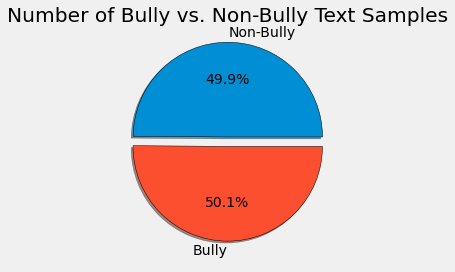

In [ ]:
# Data classification using pie chart
def performDataDistribution(df):
  plt.style.use('fivethirtyeight')

  tot = df.shape[0]
  num_non_Bully = df[df.Bully_Label==0].shape[0]
  slices = [num_non_Bully/tot,(tot - num_non_Bully)/tot]
  labeling = ['Non-Bully','Bully']
  explode = [0.1,0]
  plt.pie(slices,explode=explode,shadow=True,autopct='%1.1f%%',labels=labeling,wedgeprops={'edgecolor':'black'})
  plt.title('Number of Bully vs. Non-Bully Text Samples')
  plt.tight_layout()
  plt.show()

performDataDistribution(df)
     

In [ ]:
#removing pattern
def remove_pattern(input_txt,pattern):
  if(type(input_txt)==str):
    r= re.findall(pattern,input_txt)
    for i in r:
      input_txt = re.sub(i,'',input_txt)
    return input_txt
  else:
    return ""

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
null_rows = df[df.isnull().any(axis=1)]

In [ ]:
# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [ ]:
def performDataSetCleaning(df):
  df['text'].dtype
  df['Bully_Lable'] = df['text'].str.len()
  combi = df.append(df,ignore_index=True)

  # removes @user
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'],"@[\w]*")
  # removes extra letters 
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-z#]"," ")
  # removes all those words with size less than 3 
  combi['tidy_tweet']= combi['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

  # calculate length of headline after cleaning
  combi['length_tidy_tweet'] = combi['tidy_tweet'].str.len()

  # Applied Tokenization
  tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #creates a list

  # Applied Lemmatization 
  nltk.download('wordnet')
  lemmatizer = nltk.stem.WordNetLemmatizer()
  tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

  for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  combi['tidy_tweet'] = tokenized_tweet

  return combi,df

combi,df=performDataSetCleaning(df)  
combi.head()
     

<ipython-input-26-660658c9adf9>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-z#]"," ")
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Bully_Label,Sentiment_label,Emotion_label,Bully_Lable,tidy_tweet,length_tidy_tweet
0,shiv sena dick mother pussi,1,negative,anger,27,shiv sena dick mother pussi,27
1,mother cave,1,negative,others,11,mother cave,11
2,brother sit silent wear sare brother learn leav,0,neutral,others,47,brother silent wear sare brother learn leav,43
3,moti besan chane dal halwa kha tora work karte...,1,negative,disgust,121,moti besan chane halwa tora work kartey howey ...,111
4,rahul kanwal danc nake road today,1,negative,disgust,33,rahul kanwal danc nake road today,33


In [ ]:
df.isnull().sum()

text               0
Bully_Label        0
Sentiment_label    0
Emotion_label      0
Bully_Lable        0
dtype: int64

In [ ]:
#Dataset splitting and applying feature extraction
def performTestDataSplitting(x,y,combi,df):
  X_train, X_test,y_train,y_test = train_test_split(combi['tidy_tweet'], 
                                                    combi['Bully_Label'], 
                                                    test_size=x,random_state=y)
  print('Number of rows in the total set: {}'.format(combi.shape[0]))
  print('Number of rows in the training set: {}'.format(X_train.shape[0]))
  print('Number of rows in the test set: {}'.format(X_test.shape[0]))

  my_file = open("/content/stopwords.txt", "r")
  content = my_file.read()
  content_list = content.split("\n")
  my_file.close()

 # Instantiate the TfidfVectorizer method
  tfidf_vector = TfidfVectorizer(stop_words = content_list ,lowercase = True)

  # Fit the training data and then return the matrix
  training_data = tfidf_vector.fit_transform(X_train.values.astype('U'))
  print(X_train.shape)
  print(training_data.shape)

  # Transform testing data and return the matrix 
  testing_data = tfidf_vector.transform(X_test.values.astype('U'))

  filename = 'tfidf_vector_vocabulary.pkl'
  pickle.dump(tfidf_vector.vocabulary_, open(filename, 'wb'))

  return X_train,X_test,y_train,y_test,testing_data,filename,training_data,content_list

x_train,x_test,y_train,y_test,testing_data,filename,training_data,content_list = performTestDataSplitting(0.33,42,combi,df)

Number of rows in the total set: 12010
Number of rows in the training set: 8046
Number of rows in the test set: 3964
(8046,)
(8046, 11692)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


In [ ]:
# Applying ML models
def pipeline(X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # make a list of models
    learner_list = [LinearSVC(),LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(), 
          AdaBoostClassifier(), BaggingClassifier(), SGDClassifier()]
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []

    for learner in learner_list:
        
        print(learner)
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # making pickle file here for my various classifier

        filename = learner.__class__.__name__+".pkl"
        pickle.dump(learner, open(filename, 'wb'))


        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

final_results=pipeline(training_data,y_train,testing_data,y_test)

LinearSVC()
Training LinearSVC
Training LinearSVC finished in 0.05 sec
----------------------------------------------------
LogisticRegression()
Training LogisticRegression
Training LogisticRegression finished in 0.21 sec
----------------------------------------------------
MultinomialNB()
Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
DecisionTreeClassifier()
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 1.04 sec
----------------------------------------------------
AdaBoostClassifier()
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.53 sec
----------------------------------------------------
BaggingClassifier()
Training BaggingClassifier
Training BaggingClassifier finished in 7.79 sec
----------------------------------------------------
SGDClassifier()
Training SGDClassifier
Training SGDClassifier finished in 0.05 sec
--------------------------------------------

In [ ]:
def performFinalResults(final_results):
  results = pd.DataFrame(final_results)
  results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

  results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

  return results

results=performFinalResults(final_results)
results.reset_index(drop = True)
     

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,DecisionTreeClassifier,0.907417,0.919939,0.895730,0.907673,0.010085,0.994904,0.998241,0.991513,0.994865,1.035907
1,BaggingClassifier,0.904894,0.921256,0.888779,0.904726,0.110476,0.989187,0.994698,0.983525,0.989080,7.788670
2,LinearSVC,0.899092,0.896365,0.906157,0.901235,0.000857,0.979866,0.976450,0.983275,0.979851,0.046373
3,SGDClassifier,0.876640,0.872133,0.887289,0.879646,0.001062,0.959607,0.955908,0.963305,0.959592,0.051156
4,MultinomialNB,0.857719,0.846890,0.878848,0.862573,0.003998,0.927666,0.916342,0.940589,0.928307,0.007498
5,LogisticRegression,0.853179,0.854105,0.857498,0.855798,0.001633,0.931394,0.924533,0.938842,0.931632,0.209194
6,AdaBoostClassifier,0.755298,0.875000,0.604767,0.715208,0.108142,0.774298,0.891351,0.622566,0.733098,0.529961


In [ ]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.755298,0.846890,0.604767,0.715208,0.000857,0.774298,0.891351,0.622566,0.733098,0.007498
max,0.907417,0.921256,0.906157,0.907673,0.110476,0.994904,0.998241,0.991513,0.994865,7.788670


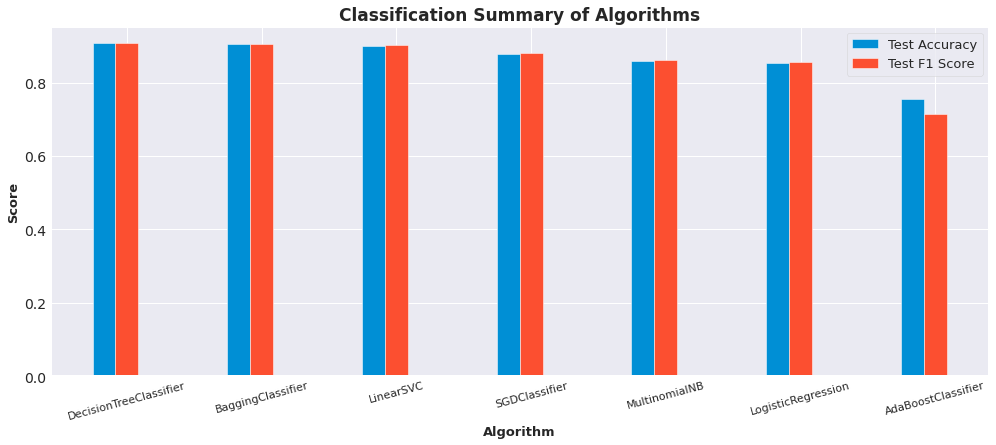

In [ ]:
# Classification of Summary of Algorithma 
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

Text(0.5, 1.0, 'Training and Prediction time of Algorithms')

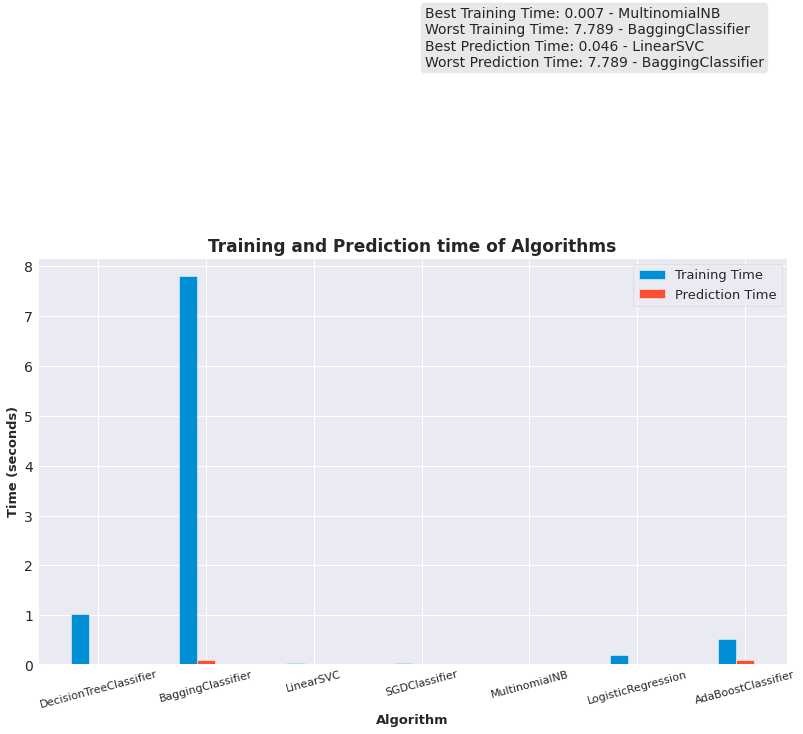

In [ ]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)


textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(3.2, 12, textstr, fontsize=14,  bbox=props) 

# Create legend & Show graphic
plt.legend(fontsize = 13)
plt.title('Training and Prediction time of Algorithms', fontweight = 'bold', fontsize = 17)

In [ ]:

from sklearn.model_selection import GridSearchCV
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print("Best Parameters: {}".format(grid_fit.best_params_))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions)))
    print("Precision: {:.4f}".format(precision_score(y_test, best_predictions)))
    print("Recall: {:.4f}".format(recall_score(y_test, best_predictions)))

In [ ]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_linsvc = LinearSVC()

param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)
pickle.dump(clf_linsvc, open('clf_svc_model.pkl', 'wb'))

LinearSVC

Optimized Model
------
Best Parameters: {'C': 1.2}
Accuracy: 0.8996
F1-score: 0.9016
Precision: 0.8980
Recall: 0.9052


# Third Approach


In [ ]:
df = pd.read_csv('/content/cleaned_hinglish_dataset.csv')

In [ ]:
null_rows = df[df.isnull().any(axis=1)]

In [ ]:
# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [ ]:
import re

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Preprocessing the dataset
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
X = vectorizer.fit_transform(df['text'])
y = df['Bully_Label']

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Define stop words
stop_words = set(nltk.corpus.stopwords.words('hinglish'))

In [ ]:
# Data preprocessing
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x)) # remove non-alphanumeric characters
df['text'] = df['text'].apply(lambda x: x.lower()) # convert text to lowercase

# Tokenize words and remove stop words
df['text'] = df['text'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stop_words])

In [ ]:
# Convert text to string format for TfidfVectorizer
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Bully_Label'], test_size=0.2, random_state=42)

In [ ]:
# Build pipeline for AdaBoost
ada_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))
])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Build pipeline for Bagging
bag_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', BaggingClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# Fit pipelines to training data
ada_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words={'a', 'aadi', 'aaj', 'aap', 'aapne',
                                             'aata', 'aati', 'aaya', 'aaye',
                                             'ab', 'abbe', 'abbey', 'abe',
                                             'abhi', 'able', 'about', 'above',
                                             'accha', 'according',
                                             'accordingly', 'acha', 'achcha',
                                             'across', 'actually', 'after',
                                             'afterwards', 'again', 'against',
                                             'agar', 'ain', ...})),
                ('clf', BaggingClassifier(n_estimators=100, random_state=42))])

In [ ]:
# Predict labels of testing data
ada_y_pred = ada_clf.predict(X_test)
bag_y_pred = bag_clf.predict(X_test)

In [ ]:
# Evaluate model performance
print("AdaBoost:")
print("Training Accuracy: {:.2f}".format(ada_clf.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(accuracy_score(y_test, ada_y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, ada_y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, ada_y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, ada_y_pred)))

AdaBoost:
Training Accuracy: 0.82
Testing Accuracy: 0.78
Precision: 0.81
Recall: 0.74
F1 Score: 0.77


In [ ]:


print("Bagging:")
print("Training Accuracy: {:.2f}".format(bag_clf.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(accuracy_score(y_test, bag_y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, bag_y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, bag_y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, bag_y_pred)))

Bagging:
Training Accuracy: 1.00
Testing Accuracy: 0.79
Precision: 0.80
Recall: 0.78
F1 Score: 0.79


In [ ]:
# Build pipeline for Boosting
boost_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
])


In [ ]:
boost_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [ ]:
boost_y_pred = boost_clf.predict(X_test)

In [ ]:
print("Boosting:")
print("Training Accuracy: {:.2f}".format(boost_clf.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(accuracy_score(y_test, boost_y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, boost_y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, boost_y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, boost_y_pred)))

Boosting:
Training Accuracy: 0.83
Testing Accuracy: 0.78
Precision: 0.86
Recall: 0.69
F1 Score: 0.76


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Define TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stop_words)

# Convert text to feature vectors
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(


In [ ]:

# Define classifiers for VotingClassifier
clf1 = LogisticRegression(random_state=42)
clf2 = LinearSVC(random_state=42)
clf3 = MultinomialNB()


# Build VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svm', clf2), ('nb', clf3), voting='hard')

# Fit VotingClassifier on training set
voting_clf.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svm', LinearSVC(random_state=42)),
                             ('nb', MultinomialNB())])

In [ ]:

'''# Define stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

# Load Hindi-English code mixed dataset
df = pd.read_csv('hindi_english_code_mixed_dataset.csv', encoding='utf-8')

# Data preprocessing
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x)) # remove non-alphanumeric characters
df['text'] = df['text'].apply(lambda x: x.lower()) # convert text to lowercase

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
'''



# Predict on training and testing sets
y_train_pred = voting_clf.predict(X_train_tfidf)
y_test_pred = voting_clf.predict(X_test_tfidf)

# Calculate training and testing accuracy, precision, recall, and f1 score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training precision:", train_precision)
print("Testing precision:", test_precision)
print("Training recall:", train_recall)
print("Testing recall:", test_recall)
print("Training f1 score:", train_f1)
print("Testing f1 score:", test_f1)


Training accuracy: 0.9435886761032473
Testing accuracy: 0.7918401332223147
Training precision: 0.9438042332464476
Testing precision: 0.7920351373855121
Training recall: 0.9435886761032473
Testing recall: 0.7918401332223147
Training f1 score: 0.9435815499397444
Testing f1 score: 0.7917595518553056


In [ ]:
# Define TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=stop_words)

# Convert text to feature vectors
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define classifiers for VotingClassifier
clf1 = LogisticRegression(random_state=42)
clf2 = LinearSVC(random_state=42)
clf3 = MultinomialNB()
clf4 = DecisionTreeClassifier()

# Build VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svm', clf2), ('nb', clf3),('dt', clf4)],voting='hard')


# Fit VotingClassifier on training set
voting_clf.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svm', LinearSVC(random_state=42)),
                             ('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:

# Predict on training and testing sets
y_train_pred = voting_clf.predict(X_train_tfidf)
y_test_pred = voting_clf.predict(X_test_tfidf)

In [ ]:



# Calculate training and testing accuracy, precision, recall, and f1 score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training precision:", train_precision)
print("Testing precision:", test_precision)
print("Training recall:", train_recall)
print("Testing recall:", test_recall)
print("Training f1 score:", train_f1)
print("Testing f1 score:", test_f1)


Training accuracy: 0.9644046627810158
Testing accuracy: 0.787676935886761
Training precision: 0.9645983027454464
Testing precision: 0.7880378054594911
Training recall: 0.9644046627810158
Testing recall: 0.787676935886761
Training f1 score: 0.9644011103747815
Testing f1 score: 0.7876601545385524


Finished

Deep Learning start

In [ ]:
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [ ]:

# Reading the dataset
data = pd.read_csv('/content/cleaned_hinglish_dataset.csv')
null_rows = data[data.isnull().any(axis=1)]
# Replace null values based on target class
data.loc[(data['Bully_Label'] == 0) & (data['text'].isnull()), 'text'] = 'good'
data.loc[(data['Bully_Label'] == 1) & (data['text'].isnull()), 'text'] = 'abuse'



In [ ]:
data.isnull().sum()

text               0
Bully_Label        0
Sentiment_label    0
Emotion_label      0
dtype: int64

In [ ]:
# Preprocessing the dataset
X = data['text'].values
y = data['Bully_Label'].values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the deep learning model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
61/61 [==============================] - 29s 424ms/step - loss: 0.5787 - accuracy: 0.6956 - val_loss: 0.4175 - val_accuracy: 0.7929
Epoch 2/10
61/61 [==============================] - 28s 455ms/step - loss: 0.3213 - accuracy: 0.8634 - val_loss: 0.4335 - val_accuracy: 0.7929
Epoch 3/10
61/61 [==============================] - 29s 477ms/step - loss: 0.2240 - accuracy: 0.9136 - val_loss: 0.4808 - val_accuracy: 0.7877
Epoch 4/10
61/61 [==============================] - 33s 547ms/step - loss: 0.1724 - accuracy: 0.9375 - val_loss: 0.5914 - val_accuracy: 0.7773


In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

38/38 [==============================] - 2s 46ms/step


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7660283097418817
Precision: 0.7666807520469574
Recall: 0.7660283097418817
F1-score: 0.7659669860750538


Finish, but you try your last LSTM chat gpt model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

# Load the dataset
dataset = pd.read_csv('/content/cleaned_hinglish_dataset.csv')
null_rows = data[data.isnull().any(axis=1)]
# Replace null values based on target class
data.loc[(data['Bully_Label'] == 0) & (data['text'].isnull()), 'text'] = 'good'
data.loc[(data['Bully_Label'] == 1) & (data['text'].isnull()), 'text'] = 'abuse'

In [ ]:
# Preprocessing the dataset
X = data['text'].values
y = data['Bully_Label'].values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)




In [ ]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['Bully_Label'], test_size=0.2)

In [ ]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['Bully_Label'], test_size=0.2)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = max([len(s) for s in X_train])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

AttributeError: ignored

In [ ]:

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: ignored

In [ ]:





# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


# LAST APPROACH LSTM

In [89]:
import pandas as pd
import numpy as np
import re

In [90]:

!pip install indic-transliteration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:

from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

In [92]:

from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv('/content/cleaned_hinglish_dataset.csv')


In [93]:
df.tail(5)

,text,Bully_Label,Sentiment_label,Emotion_label
6000,dali sali kayo fhshdhdhdhd follow naman random...,0,neutral,others
6001,rajput mughalon bed hot krti phir english bawa...,1,negative,disgust
6002,occas circumcis thing god creat nake remain na...,1,negative,others
6003,crazi mother pussi,1,negative,disgust
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness


In [94]:
null_rows = df[df.isnull().any(axis=1)]
# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [95]:
def transliterate_text(text):
    # Regular expression to identify Hinglish words
    pattern = re.compile(r'[a-zA-Z]*[\u0900-\u097F][a-zA-Z]*')
    
    # Split the text into words
    words = text.split()
    
    # Transliterate Hinglish words to Hindi
    for i in range(len(words)):
        if pattern.match(words[i]):
            words[i] = transliterate(words[i],    sanscript.DEVANAGARI, sanscript.ITRANS)
            
    # Join the words back into text
    return ' '.join(words)


In [96]:
df['text'] = df['text'].apply(transliterate_text)

In [97]:
df.tail(3)

,text,Bully_Label,Sentiment_label,Emotion_label
6002,occas circumcis thing god creat nake remain na...,1,negative,others
6003,crazi mother pussi,1,negative,disgust
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness


You can use the WordNetLemmatizer from the nltk package to perform lemmatization on an English dataset. Here's an example code snippet that demonstrates how to apply lemmatization on a dataframe:In this example, the WordNetLemmatizer is used to lemmatize each word in the input sentence. The pos='v' argument is passed to the lemmatize() function to specify that the words should be lemmatized as verbs.

You can adapt this code to your specific dataframe and column name. The lemmatized text will be stored in a new column called 'lemmatized_text'.

In [98]:

import nltk
from nltk.stem import WordNetLemmatizer

# Download the necessary resources for the WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Sample dataframe


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [100]:
def lemmatize_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    
    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    
    return lemmatized_sentence

# Apply lemmatization to the 'text' column of the dataframe
df['lemmatized_text'] = df['text'].apply(lemmatize_sentence)

In [101]:
df.tail(5)

,text,Bully_Label,Sentiment_label,Emotion_label,lemmatized_text
6000,dali sali kayo fhshdhdhdhd follow naman random...,0,neutral,others,dali sali kayo fhshdhdhdhd follow naman random...
6001,rajput mughalon bed hot krti phir english bawa...,1,negative,disgust,rajput mughalon bed hot krti phir english bawa...
6002,occas circumcis thing god creat nake remain na...,1,negative,others,occas circumcis thing god creat nake remain na...
6003,crazi mother pussi,1,negative,disgust,crazi mother pussi
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness,love claim betray sharma sharmabrand trend sha...


Load the pre-trained word embedding model. There are various pre-trained models available, such as GloVe, Word2Vec, and FastText. You can use any of these models depending on your preference and the requirements of your task. Here's an example of how to load a GloVe model using the gensim package:
In this example, we are loading a GloVe model trained on Twitter data with 50-dimensional embeddings.

Tokenize the text into individual words or sub-words. Since the input text is in Hinglish, you may need to use a tokenizer that can handle mixed language text. Here's an example of how to use the indic_tokenize function from the indicnlp package to tokenize Hinglish text:

In [102]:
import gensim.downloader as api

# Load the pre-trained GloVe model
model = api.load('glove-twitter-50')


In [103]:

pip install indicnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:


from indicnlp.tokenize import indic_tokenize
import pandas as pd


# Define a function to tokenize Hinglish text
def tokenize_hinglish(text):
    return indic_tokenize.trivial_tokenize(text)

# Tokenize the 'Text' column of the DataFrame
df['Tokens'] = df['lemmatized_text'].apply(tokenize_hinglish)


In [106]:
df.tail(2)

,text,Bully_Label,Sentiment_label,Emotion_label,lemmatized_text,Tokens
6003,crazi mother pussi,1,negative,disgust,crazi mother pussi,"[crazi, mother, pussi]"
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness,love claim betray sharma sharmabrand trend sha...,"[love, claim, betray, sharma, sharmabrand, tre..."


In this example, the trivial_tokenize() function is used to tokenize a Hinglish sentence into individual words.

Convert each token into its corresponding vector representation using the pre-trained model. To do this, you can simply pass each token to the model() function and it will return a numpy array representing the embedding for that token. If a token is not present in the model vocabulary, it will return a vector of zeros. Here's an example of how to convert a list of tokens into their corresponding vectors:

In [107]:
import gensim

# Load the pre-trained FastText model
model_path = 'path/to/fasttext/model'

In [108]:
# Preprocessing the dataset
X = df['Tokens'].values

In [109]:

y = df['Bully_Label'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df['Tokens'], df['Bully_Label'], test_size=0.2)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = max([len(s) for s in X_train])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [111]:

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Train the model
#model.fit(train_data, train_df['Bully_Label'], batch_size=32, epochs=10)
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
151/151 [==============================] - 21s 116ms/step - loss: 0.6434 - accuracy: 0.5943
Epoch 2/10
151/151 [==============================] - 24s 160ms/step - loss: 0.3935 - accuracy: 0.8347
Epoch 3/10
151/151 [==============================] - 21s 141ms/step - loss: 0.2878 - accuracy: 0.8963
Epoch 4/10
151/151 [==============================] - 11s 71ms/step - loss: 0.2263 - accuracy: 0.9226
Epoch 5/10
151/151 [==============================] - 11s 76ms/step - loss: 0.1905 - accuracy: 0.9407
Epoch 6/10
151/151 [==============================] - 11s 76ms/step - loss: 0.1642 - accuracy: 0.9507
Epoch 7/10
151/151 [==============================] - 11s 75ms/step - loss: 0.1474 - accuracy: 0.9577
Epoch 8/10
151/151 [==============================] - 10s 67ms/step - loss: 0.1378 - accuracy: 0.9617
Epoch 9/10
151/151 [==============================] - 11s 74ms/step - loss: 0.1280 - accuracy: 0.9652
Epoch 10/10
151/151 [==============================] - 12s 77ms/step - loss: 0.

In [113]:
# Evaluate the model on train and test sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [116]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

38/38 [==============================] - 1s 16ms/step


In [117]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print the results
print("Training Accuracy: {:.4f}".format(train_acc))
print("Testing Accuracy: {:.4f}".format(test_acc))


Training Accuracy: 0.9792
Testing Accuracy: 0.7552


In [122]:
# Make predictions on the training and testing sets
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred= (model.predict(X_test) > 0.5).astype("int32")



38/38 [==============================] - 0s 12ms/step


In [120]:

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1_score))

Precision: 0.7196
Recall: 0.7858
F1 Score: 0.7513


# ROBERT model

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, GlobalMaxPooling1D, LSTM, Embedding, Bidirectional, Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [31]:
# Load the dataset from CSV file
df = pd.read_csv("/content/cleaned_hinglish_dataset.csv")
null_rows = df[df.isnull().any(axis=1)]
# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [32]:



# Shuffle the data
df = shuffle(df)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [33]:

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)



In [34]:
train_data["text"] = train_data["text"].astype(str)
tokenizer.fit_on_texts(train_data["text"])

In [35]:
# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data["text"])

In [36]:
test_data["text"] = test_data["text"].astype(str)
test_sequences = tokenizer.texts_to_sequences(test_data["text"])

In [37]:

# Pad sequences to a fixed length
max_len = 100
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)


In [38]:

# Define the model architecture
input = Input(shape=(max_len,))
x = Embedding(10000, 128)(input)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid")(x)
model = Model(input, output)

In [39]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [40]:


model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=0.2)

NameError: ignored

In [41]:

# Train the model
model.fit(train_data, train_data["Bully_Label"], batch_size=32, epochs=10, validation_split=0.2)

IndexError: ignored

In [ ]:



# Evaluate the model
model.evaluate(test_data, test_data["Bully_Label"])


NEXT ROBERT CODE

In [26]:
!pip install transformers
from transformers import RobertaTokenizer, TFRobertaModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.8 MB/s eta 0:00:00


In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


# Load the dataset from a CSV file
df = pd.read_csv("/content/cleaned_hinglish_dataset.csv")


In [99]:
null_rows = df[df.isnull().any(axis=1)]

# Replace null values based on target class
df.loc[(df['Bully_Label'] == 0) & (df['text'].isnull()), 'text'] = 'good'
df.loc[(df['Bully_Label'] == 1) & (df['text'].isnull()), 'text'] = 'abuse'

In [100]:

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel

# Load the dataset
#dataset = pd.read_csv('mixed_dataset.csv')


#encoded_data = [tokenizer.encode_plus(text, add_special_tokens=True, max_length=64, pad_to_max_length=True, return_attention_mask=True, return_token_type_ids=False, return_tensors='tf') for text in dataset.text.values]



In [101]:
# Tokenize the text data using BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

In [102]:
encoded_data = [tokenizer.encode_plus(text, add_special_tokens=True, max_length=64, pad_to_max_length=True, return_attention_mask=True, return_token_type_ids=False, return_tensors='tf') for text in df.text.values]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [103]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(encoded_data))
train_input = [encoded_data[i]['input_ids'] for i in range(train_size)]
train_masks = [encoded_data[i]['attention_mask'] for i in range(train_size)]

In [104]:


test_input = [encoded_data[i]['input_ids'] for i in range(train_size, len(encoded_data))]
test_masks = [encoded_data[i]['attention_mask'] for i in range(train_size, len(encoded_data))]

In [105]:
train_label = tf.convert_to_tensor(df.Bully_Label[:train_size].values)

In [106]:
test_label = tf.convert_to_tensor(df.Bully_Label[train_size:].values)

In [92]:

# Load the BERT model
bert_model = TFAutoModel.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [107]:

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(64,), dtype=tf.int32)
attention_masks = tf.keras.layers.Input(shape=(64,), dtype=tf.int32)
output = bert_model(input_ids, attention_mask=attention_masks)[1]
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

In [109]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit([train_input, train_masks], train_label, batch_size=32, epochs=10, validation_data=([test_input, test_masks], test_label))

In [134]:
# Train model
history= model.fit([train_input, train_masks], validation_data=([test_input, test_masks], train_label), batch_size=32, epochs=10)

Epoch 1/10


ValueError: ignored

In [136]:
# Convert labels to numerical values
#labels = dataset.label.replace({'Not Aggressive': 0, 'Aggressive': 1}).values


#test_labels = labels[train_size:]






# Evaluate the model
test_loss, test_acc = model.evaluate([test_input, test_masks], test_label)
print('Test accuracy:', test_acc)


ValueError: ignored